In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import display, Audio

In [283]:
wav, sr = librosa.load('new.wav', sr=16000)
wav = (wav - wav.min())/(wav.max() - wav.min())

S_full, phase = librosa.magphase(librosa.stft(wav))

In [284]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(3, sr=sr)))

S_filter = np.minimum(S_full, S_filter)

In [285]:
#margin_i, margin_v = 15, 2
margin_i, margin_v = 20, 1
power = 5

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)


S_foreground = mask_v * S_full
S_background = mask_i * S_full

In [286]:
from scipy.spatial.distance import cosine

display(Audio(librosa.istft(S_foreground*phase), rate=16000))

0.0074254586674818174 0.9551171027123928 5.960464477539063e-08 0.00375211238861084 1025


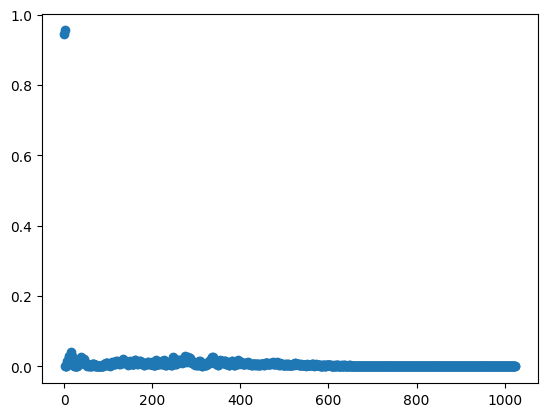

In [287]:
dist = []
for i in range(0, len(S_full)):
    dist.append(cosine(S_full[i], S_foreground[i]))

print(np.mean(dist), np.max(dist), np.min(dist), np.median(dist), len(dist))

plt.scatter([i for i in range(0, len(dist))],dist)
plt.show()

In [289]:
S_new = np.zeros(S_full.shape, S_full.dtype)
#print(len(S_foreground), len(S_full))
np_zer = np.zeros((707,))
for i in range(0, len(dist)):
    if dist[i]> 0.001:
        S_new[i] = S_full[i]

y_badum = librosa.istft(S_new*phase)
display(Audio(y_badum, rate=16000))


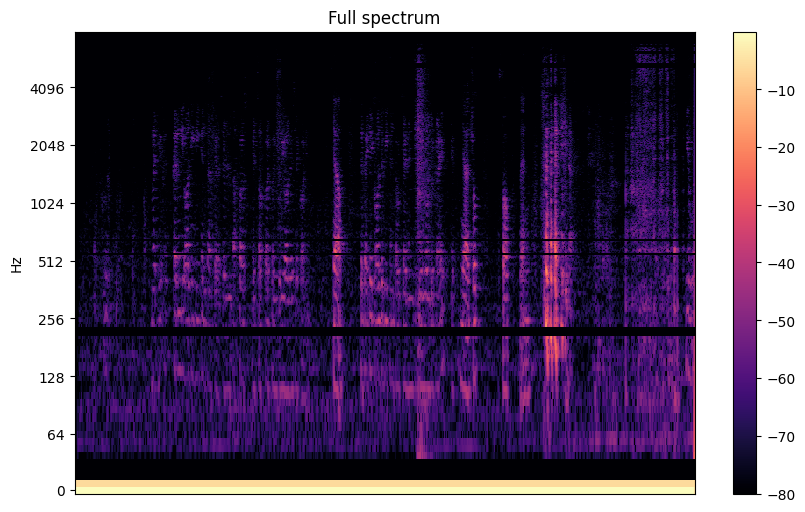

In [290]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_new, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()


In [133]:
y_0 = librosa.istft(S_background*phase)
y_1 = librosa.istft(S_foreground*phase)
y_2 = librosa.istft((S_full - S_foreground)*phase)

yy = wav[0:len(y_1)] - y_1

#display(Audio(wav, rate=sr))
#display(Audio(y_0, rate=sr))
#display(Audio(y_1, rate=sr))
#display(Audio(yy, rate=sr))
#display(Audio(y_2, rate=sr))

In [155]:
wav_norm = (wav - wav.min())/(wav.max() - wav.min())
y1_norm = (y_1 - y_1.min())/(y_1.max() - y_1.min())

extract = np.mean(wav_norm[0:len(y_1)], wav_norm[0:len(y_1)] - y1_norm)
extract2 = np.minimum(y1_norm, wav_norm[0:len(y_1)] - y1_norm)

display(Audio(wav_norm, rate=16000))
display(Audio(extract, rate=16000))
display(Audio(extract2, rate=16000))

(extract<y1_norm)


array([ True,  True,  True, ...,  True,  True,  True])

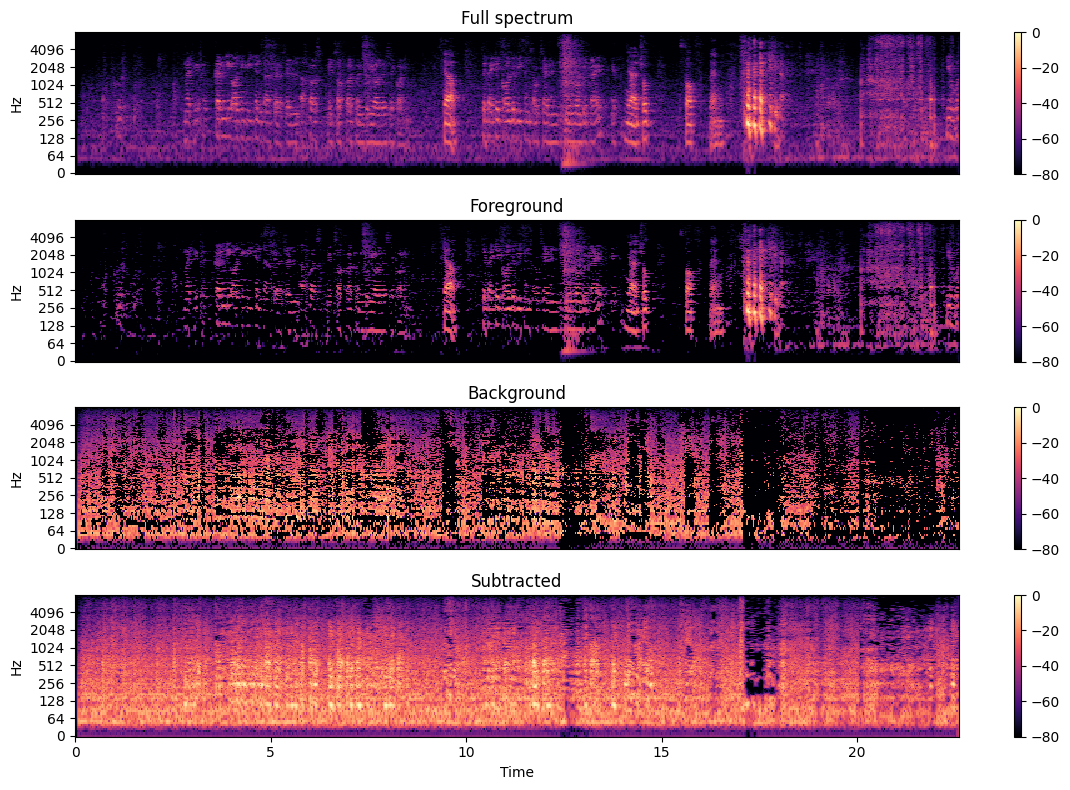

In [129]:
S_ext, phase = librosa.magphase(librosa.stft(yy))

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(4, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.subplot(4, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_background, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()

plt.subplot(4, 1, 4)
librosa.display.specshow(librosa.amplitude_to_db(S_ext, ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Subtracted')
plt.colorbar()

plt.tight_layout()
plt.show()

In [109]:
new, sr = librosa.load('kitchen_final_record.wav', sr=16000, mono=False)

print(new.shape)
remmaaa = (new[0] - new[1])/2
njn = new.mean(axis=0) - remmaaa
print(njn.shape)
display(Audio(njn, rate=16000))

(2, 361600)
(361600,)
